## Analysis of labour force participation rate by sex and age

- Author: Jiefang Li
- Description: The data come from International Labour Organization.The labour force comprises all persons of working age who furnish the supply of labour for the production of goods and services during a specified time-reference period. It refers to the sum of all persons of working age who are employed and those who are unemployed. The series is part of the ILO modelled estimates and is harmonized to account for differences in national data and scope of coverage, collection and tabulation methodologies as well as for other country-specific factors.

- Link for downloading: https://www.ilo.org/shinyapps/bulkexplorer51/?lang=en&segment=indicator&id=EAP_2WAP_SEX_AGE_RT_A
- How to download: clcick the export button directly


- Questions
    - What's the difference between the labour force partipation rate between women and man?
    - What's the trending for the labour force partipation rate of woman in different ages?
    

# Load the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
overall_df = pd.read_csv('EAP_2WAP_SEX_AGE_RT_A-filtered-2022-03-11.csv')
overall_df

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label
0,Afghanistan,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Male,"Age (Youth, adults): 15-24",1990,62.130,NaN
1,Afghanistan,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Male,"Age (Youth, adults): 25+",1990,86.596,NaN
2,Afghanistan,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Female,"Age (Youth, adults): 15-24",1990,13.643,NaN
3,Afghanistan,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Female,"Age (Youth, adults): 25+",1990,16.050,NaN
4,Afghanistan,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Male,"Age (Youth, adults): 15-24",1991,61.987,NaN
...,...,...,...,...,...,...,...,...
34467,Zimbabwe,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Female,"Age (Youth, adults): 25+",2019,84.986,NaN
34468,Zimbabwe,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Male,"Age (Youth, adults): 15-24",2020,78.815,NaN
34469,Zimbabwe,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Male,"Age (Youth, adults): 25+",2020,94.639,NaN
34470,Zimbabwe,Labour force participation rate by sex and age...,ILO - ILO Modelled Estimates,Sex: Female,"Age (Youth, adults): 15-24",2020,69.404,NaN


# Clean and reorganize the data

In [5]:
cleaned_df = overall_df.drop(['indicator.label', 'source.label', 'obs_status.label'], axis=1)
cleaned_df

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",1990,62.130
1,Afghanistan,Sex: Male,"Age (Youth, adults): 25+",1990,86.596
2,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",1990,13.643
3,Afghanistan,Sex: Female,"Age (Youth, adults): 25+",1990,16.050
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",1991,61.987
...,...,...,...,...,...
34467,Zimbabwe,Sex: Female,"Age (Youth, adults): 25+",2019,84.986
34468,Zimbabwe,Sex: Male,"Age (Youth, adults): 15-24",2020,78.815
34469,Zimbabwe,Sex: Male,"Age (Youth, adults): 25+",2020,94.639
34470,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2020,69.404


# Basic info

### rough overview of the data

In [6]:
cleaned_df.describe()

,time,obs_value
count,34472.000000,34472.00000
mean,2005.000000,56.41451
std,8.944402,20.76259
min,1990.000000,4.71100
25%,1997.000000,41.53825
50%,2005.000000,55.74350
75%,2013.000000,73.02400
max,2020.000000,99.46700


### Number of countreis included in the data

In [7]:
countries = cleaned_df['ref_area.label'].unique()
print(len(countries))
print(countries)

278
['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Channel Islands' 'Switzerland' 'Chile' 'China' "Côte d'Ivoire"
 'Cameroon' 'Congo, Democratic Republic of the' 'Congo' 'Colombia'
 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany'
 'Djibouti' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Western Sahara' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Guatemala' 'Guam' 'Guyana'
 'Hong Kong, China' 'Honduras' 'Croatia' 'Haiti' 'Hungary' 'Indonesia'
 'India' 'Ireland' 'Iran, Islamic Republic of' 'Iraq' 'Iceland' 'Israel'
 '

## Question 1: Compare the labour force partipation rate between women and man (age >25)

In [9]:
sexes = cleaned_df['sex.label'].unique()
sexes

array(['Sex: Male', 'Sex: Female'], dtype=object)

### China

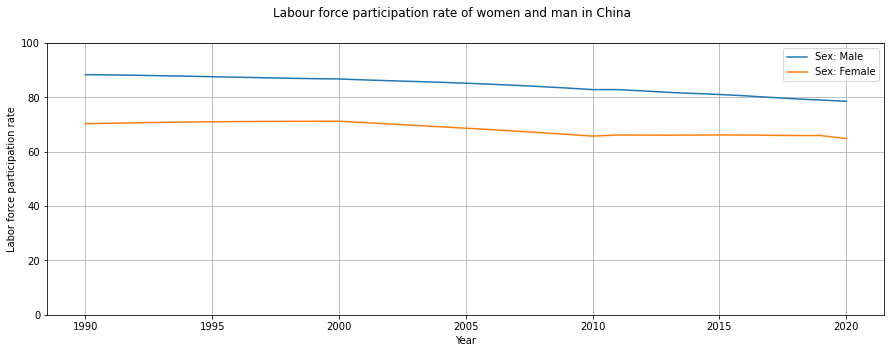

In [10]:
##Plot summary: 
#Both women and man's participation rate are higher than 70% there is a slightly decreasing trend for both man and women
#The difference between man and women are also dreasing

china_df = cleaned_df.loc[(cleaned_df['ref_area.label'] == 'China') & 
                          (cleaned_df['classif1.label'] == 'Age (Youth, adults): 25+')]

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate of women and man in China")  

for sex in sexes:
        d1 = china_df[china_df['sex.label']== sex]                 
        plt.plot(d1['time'],d1['obs_value'],label=sex)

plt.legend()
plt.grid()

### United States

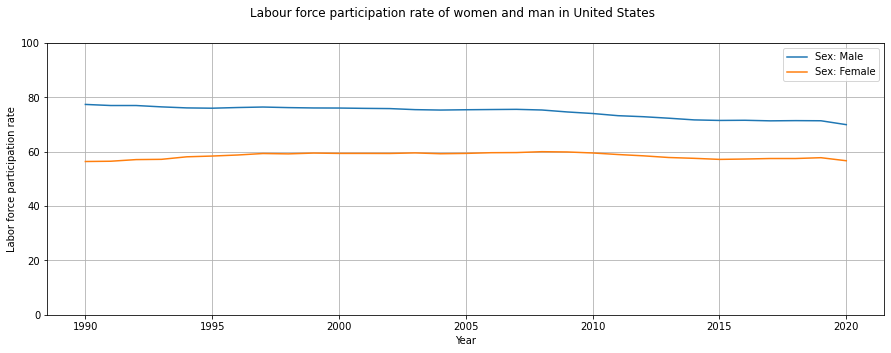

In [11]:
##Plot summary: 
#Both women and man's participation rate are higher than 55% 
#There is a slightly decreasing trend for both man and women
#The difference between man and women are also dreasing

us_df = cleaned_df.loc[(cleaned_df['ref_area.label'] == 'United States') & 
                          (cleaned_df['classif1.label'] == 'Age (Youth, adults): 25+')]

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate of women and man in United States")  

for sex in sexes:
        d1 = us_df[us_df['sex.label']== sex]                 
        plt.plot(d1['time'],d1['obs_value'],label=sex)

plt.legend()
plt.grid()

### Saudi Arabia

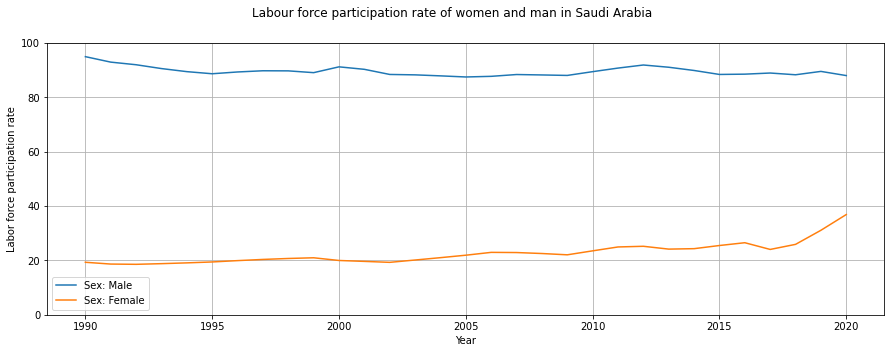

In [12]:
##Plot summary: 
#Man's participation rate are higher than 80%, but women's participation rate is always lower than 40% 
#There is a slightly decreasing trend for both man and women
#The difference between man and women are quite stable until the most recent five years

saudi_df = cleaned_df.loc[(cleaned_df['ref_area.label'] == 'Saudi Arabia') & 
                          (cleaned_df['classif1.label'] == 'Age (Youth, adults): 25+')]

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate of women and man in Saudi Arabia") 

for sex in sexes:
        d1 = saudi_df[saudi_df['sex.label']== sex]                 
        plt.plot(d1['time'],d1['obs_value'],label = sex)

plt.legend()
plt.grid()

### Overall comparison between China, United States and Saudi Arabia

<Figure size 1080x360 with 0 Axes>

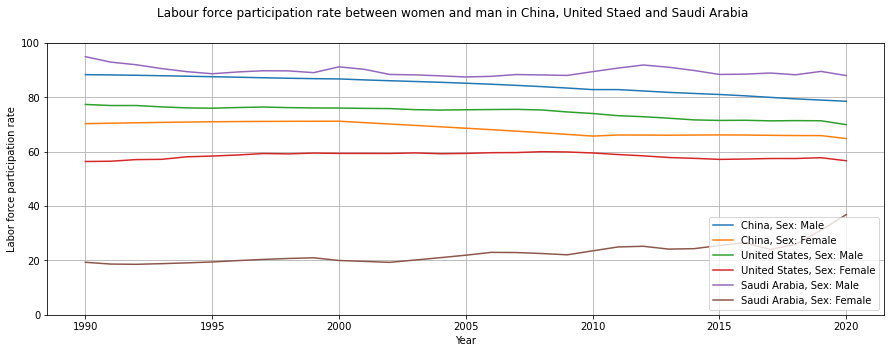

In [13]:
interested_contries = ['China', 'United States', 'Saudi Arabia']
plt.figure(figsize=(15,5))

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate between women and man in China, United Staed and Saudi Arabia")  

for c in interested_contries:
    target_df = cleaned_df.loc[(cleaned_df['ref_area.label'] == c) & 
                          (cleaned_df['classif1.label'] == 'Age (Youth, adults): 25+')]
    
    for sex in sexes:
        tag = c + ", " + sex
        d1 = target_df[target_df['sex.label']== sex] 
        plt.plot(d1['time'],d1['obs_value'],label = tag)

plt.legend()
plt.grid()

## Question 2: Compare the labour force partipation of woman in different ages

## Get the data of women

In [14]:
women_df = cleaned_df[cleaned_df ['sex.label'] == 'Sex: Female']
women_df

,ref_area.label,sex.label,classif1.label,time,obs_value
2,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",1990,13.643
3,Afghanistan,Sex: Female,"Age (Youth, adults): 25+",1990,16.050
6,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",1991,13.714
7,Afghanistan,Sex: Female,"Age (Youth, adults): 25+",1991,16.068
10,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",1992,13.744
...,...,...,...,...,...
34463,Zimbabwe,Sex: Female,"Age (Youth, adults): 25+",2018,84.792
34466,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2019,70.750
34467,Zimbabwe,Sex: Female,"Age (Youth, adults): 25+",2019,84.986
34470,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2020,69.404


In [15]:
ages = women_df['classif1.label'].unique()
ages


array(['Age (Youth, adults): 15-24', 'Age (Youth, adults): 25+'],
      dtype=object)

## China

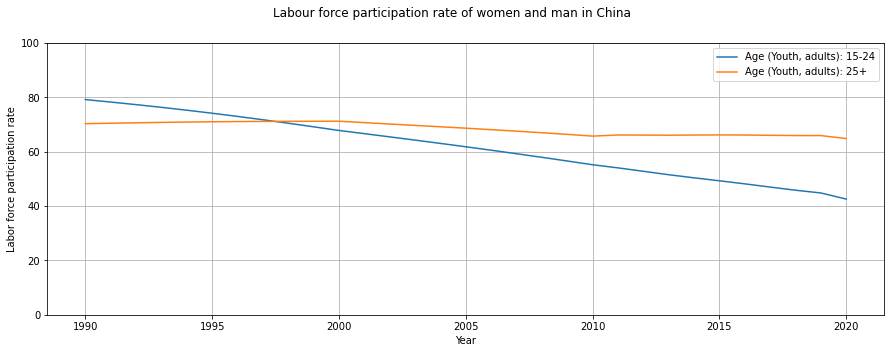

In [16]:
#Plot summary: 
#The larbour force participation rate for women between age 15 - 24 is decreasing significantly
#The larbour force participation rate for women who's older than 25 is stabel

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate") 
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate of women in China")  

for age in ages:

        d1 = women_df.loc[(women_df['classif1.label'] == age) & (women_df['ref_area.label'] == "China")]                 
        plt.plot(d1['time'],d1['obs_value'],label = age)
plt.ylim(0, 100)  
plt.suptitle("Labour force participation rate of women and man in China")  
plt.legend()
plt.grid()

### USA

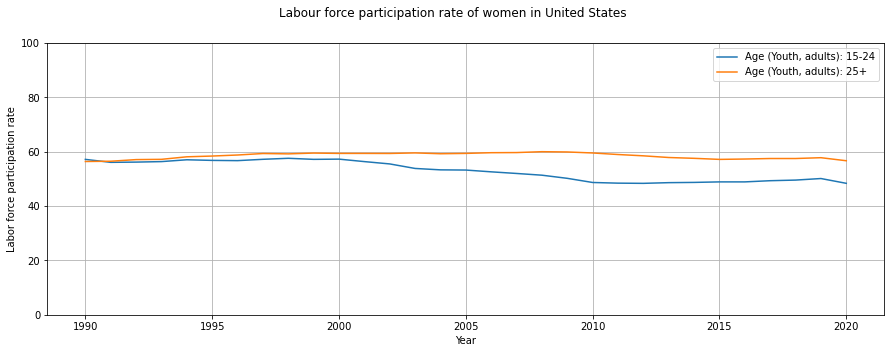

In [17]:
#Plot summary: 
#The larbour force participation rate for womenin these two groups are quite stabel around 60%


plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)
plt.suptitle("Labour force participation rate of women in United States")  

for age in ages:

        d1 = women_df.loc[(women_df['classif1.label'] == age) & (women_df['ref_area.label'] == "United States")]                 
        plt.plot(d1['time'],d1['obs_value'],label = age)

plt.legend()
plt.grid()

### Saudi Arabia

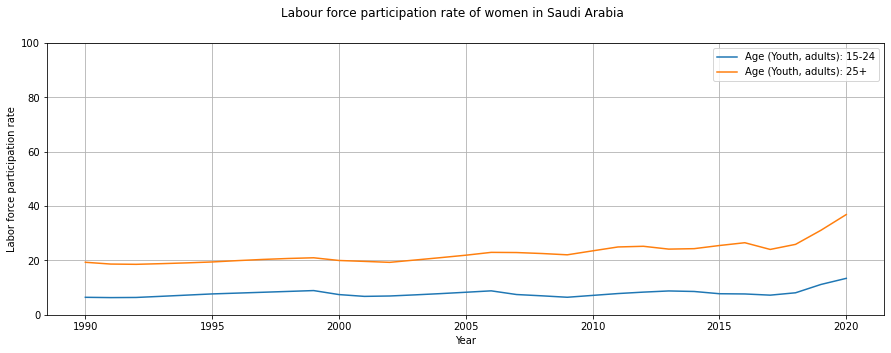

In [18]:
#Plot summary: 
#The larbour force participation rate for womenin these two groups are quite stabel
#There is a slightly increasing in the participation rate for the last five years

plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("Labor force participation rate")
plt.ylim(0, 100)  
plt.suptitle("Labour force participation rate of women in Saudi Arabia")  


for age in ages:

        d1 = women_df.loc[(women_df['classif1.label'] == age) & (women_df['ref_area.label'] == "Saudi Arabia")]                 
        plt.plot(d1['time'],d1['obs_value'],label = age)
        
plt.legend()
plt.grid()


## Pivot table

In [19]:
#This pivot table addes up the labor force participation rate in two ages groups for each country
df2 = women_df.pivot_table(values="obs_value", index=["time"], columns=["ref_area.label"])
df2

ref_area.label,ASEAN,Afghanistan,Africa,Africa: Low income,Africa: Lower-middle income,Africa: Upper-middle income,Albania,Algeria,Americas,Americas: High income,...,Western Sahara,World,World excluding BRICS,World: High income,World: Low income,World: Lower-middle income,World: Upper-middle income,Yemen,Zambia,Zimbabwe
time,,,,,,,,,,,,,,,,,,,,,
1990,56.5565,14.8465,52.1750,63.3005,46.3885,41.1460,50.7085,11.7870,47.1810,55.5135,...,21.0060,50.9295,46.7260,49.2485,59.0290,37.5080,63.1440,16.9395,71.9695,75.8510
1991,56.2395,14.8910,52.2110,63.3340,46.4595,41.1060,54.2680,11.9095,47.0655,55.0660,...,21.0615,50.7625,46.8065,49.2180,58.9465,37.5295,62.8400,16.8805,71.9820,75.8560
1992,56.3370,14.9075,52.2620,63.3300,46.5855,41.0560,55.1435,12.0195,47.4940,55.3150,...,21.1390,50.5570,46.7455,48.9935,58.8000,37.5465,62.5895,16.8235,71.9990,75.8385
1993,55.6965,14.8805,52.2390,63.3415,46.5645,41.0080,54.0930,12.1685,47.8980,55.3870,...,21.2345,50.1320,46.4375,48.6350,58.6290,37.4405,61.9805,16.7230,72.0375,75.8415
1994,56.1645,14.8555,52.3365,63.3430,46.7590,40.9575,53.1920,12.3230,48.5470,56.0615,...,21.3520,50.0065,46.6840,48.7215,58.4635,37.6565,61.6215,16.6990,72.0465,75.8595
1995,55.9595,14.8910,52.3060,63.5095,46.6095,40.8805,51.8065,12.4645,48.9635,56.1135,...,21.4595,49.6370,46.5025,48.5550,58.5100,37.3905,61.2120,17.5045,72.0735,75.8665
1996,55.8110,14.7325,52.3135,63.6915,46.5185,40.8365,50.8065,12.6090,48.7335,56.2255,...,21.5660,49.2750,46.4275,48.5025,58.5290,37.3045,60.5145,18.4160,72.1070,75.8965
1997,54.8800,14.5970,52.2905,63.7895,46.4135,40.7910,51.8865,12.6030,49.3535,56.7165,...,21.6995,48.9415,46.3750,48.6200,58.5430,37.0930,59.9800,19.3800,72.1325,75.9245
1998,54.6540,14.5100,52.2725,63.8875,46.3050,40.7575,50.8685,12.5935,49.7325,56.8740,...,21.8470,48.6505,46.3705,48.6855,58.5605,37.1280,59.3865,20.3865,72.1480,75.9595


<AxesSubplot:title={'center':'Labour force participation rate of women in different parts of Saudi Arabia'}, xlabel='time'>

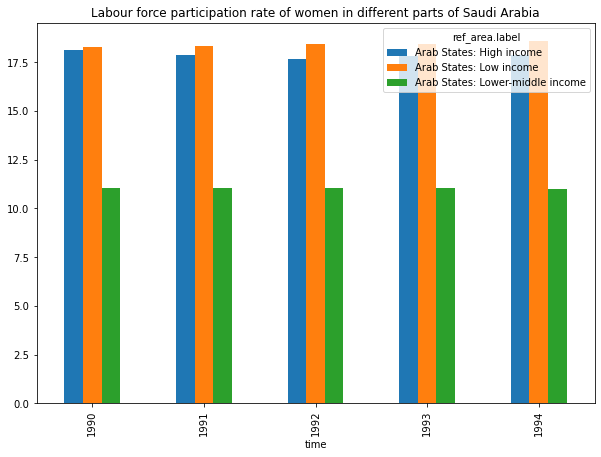

In [22]:
##Plot summary: 
#Women libe in the low income areas in Arab states have the highest larbor force participation rate

df2.iloc[0:5, 15:18].plot.bar(figsize=(10,7), 
                            title='Labour force participation rate of women in different parts of Saudi Arabia')

## Group by

In [24]:
#This is table group the results by the country for all the years and caculates the mean, min and max for each country
grouped_single = women_df.groupby("ref_area.label").agg({'obs_value': ['mean', 'min', 'max']})
grouped_single.columns = ['rate_mean', 'rate_min', 'rate_max']
grouped_single = grouped_single.reset_index()

In [25]:
#the 10 countries/areas that have the highest larbor force participation rate of women 
grouped_single.sort_values('rate_mean', ascending = False)[0:10]

,ref_area.label,rate_mean,rate_min,rate_max
245,"Tanzania, United Republic of",81.786984,69.195,90.850
154,Madagascar,81.611097,67.527,90.531
204,Rwanda,81.596629,63.109,93.095
167,Mozambique,81.443500,61.932,93.745
216,Solomon Islands,81.427387,70.550,90.769
46,Burundi,80.946774,56.964,94.495
170,Nepal,79.971887,69.048,84.229
81,Eastern Asia: Low income,77.603548,73.461,78.631
136,"Korea, Democratic People's Republic of",77.603548,73.461,78.631
140,Lao People's Democratic Republic,76.545952,60.017,83.179


In [26]:
#the 10 countries/areas that have the lowest larbor force participation rate of women
grouped_single.sort_values('rate_mean', ascending = True)[0:10]

,ref_area.label,rate_mean,rate_min,rate_max
127,Iraq,9.485871,4.711,17.164
18,Arab States: Upper-middle income,11.730032,6.812,18.228
189,Occupied Palestinian Territory,12.511823,5.019,21.853
17,Arab States: Lower-middle income,12.511823,5.019,21.853
7,Algeria,12.680194,6.817,19.498
275,Yemen,13.160774,4.829,22.921
126,"Iran, Islamic Republic of",13.434387,8.170,19.741
16,Arab States: Low income,14.637629,5.932,21.778
133,Jordan,14.834694,9.098,18.726
209,Saudi Arabia,15.250516,6.328,36.889


## Discussion

- Q1:
    - Generally, men have higher labor force participation rate than women in all the selected countries
    - The lowest participation rate for women happens in the Arab States area, with the average rate lower then 20%
    - Women live in east asia low-income area have the highest participation rate compared to the other areas
    - The difference of women participation rate in different countries might be affected by the culture

- Q2:
    - It's a little bit surprising that United States has a higher participation rate for women aged from 15 -24, compared to China.
    - Based on my personal experience, most Chinese women in this age group will attend college as a full time student, so that might be the reason causing this difference
    
